#### No of Funding per Year

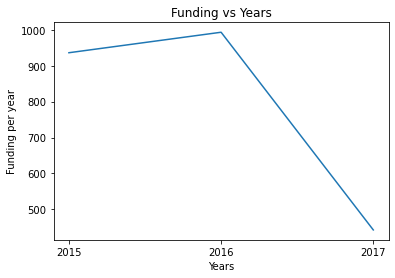

2015 936
2016 993
2017 443


In [16]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv('startup.csv')
file.Date.replace('12/05.2015','12/05/2015',inplace = True)
file.AmountInUSD.fillna(0,inplace = True)
years = []
for i in file.Date:
    years.append(i[-4:])
np_fund = np.array(file.AmountInUSD,dtype = str)
fund = []
for i in np_fund:
    j = i.replace(',','')
    fund.append(int(j))
years.reverse()
fund.reverse()
d = {}
for i in range(len(years)):
    d[years[i]] = d.get(years[i],0)+1
y = []
f = []
for i in d:
    y.append(i)
    f.append(d[i])
plt.plot(y,f)
plt.xlabel('Years')
plt.ylabel('Funding per year')
plt.title('Funding vs Years')
plt.show()
for i in d:
    print(i,d[i])


### Top cities for investing

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


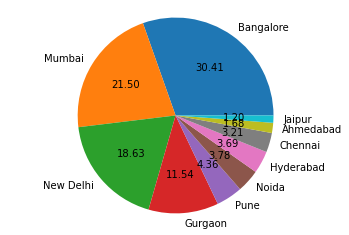

In [17]:
file.CityLocation.replace('Delhi','New Delhi',inplace = True)
file.CityLocation.replace('bangalore','Bangalore',inplace = True)
file.CityLocation.fillna('Unknown',inplace = True)
d= {}
np_loc = np.array(file.CityLocation,dtype = str)
for i in np_loc:
    if len(i.split('/')) == 2:
        j = i.split('/')
        for k in range(len(j)):
            j[k] = j[k].strip()
        d[j[0]] = d.get(j[0],0)+1
        #d[j[1]] = d.get(j[1],0)+1
        
    else:
        d[i] = d.get(i,0)+1
del d['Unknown']
num = d.values()
num = list(num)
num.sort()
num.reverse()
i = 0
pie = []
while(i<10):
    a = num[i]
    for j in d:
        if d[j] == a:
            print(j,a)
            pie.append((j,a))
            i = i+1
city = []
n = []
for i in pie:
    city.append(i[0])
    n.append(i[1])
plt.pie(n,labels = city,autopct = '%.02f')
plt.axis('equal')
plt.show()

### CIty vs amount of funds (top 10)

In [18]:
file.CityLocation.replace('Delhi','New Delhi',inplace = True)
file.CityLocation.replace('bangalore','Bangalore',inplace = True)
file.CityLocation.fillna('Unknown',inplace = True)
file.AmountInUSD.fillna(0,inplace = True)
np_fund = np.array(file.AmountInUSD,dtype = str)
fund = []
for i in np_fund:
    j = i.replace(',','')
    fund.append(int(j))
d= {}
np_loc = np.array(file.CityLocation,dtype = str)
m = 0
for i in np_loc:
    if len(i.split('/')) == 2:
        j = i.split('/')
        for k in range(len(j)):
            j[k] = j[k].strip()
        d[j[0]] = d.get(j[0],0)+fund[m]
        #d[j[1]] = d.get(j[1],0)+1   
        m = m+1
    else:
        d[i] = d.get(i,0)+fund[m]
        m = m+1
del d['Unknown']
funds = list(d.values())
funds.sort()
funds.reverse()
c= []
f = []
for i in funds[0:10]:
    f.append(i)
    for j in d:
        if d[j] == i:
            c.append(j)
s = sum(f)
for i in range(len(c)):
    print(c[i],end = ' ')
    a = f[i]*100/s
    print('%.02f'%a)
    




Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


### Investment type vs amount of funds

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


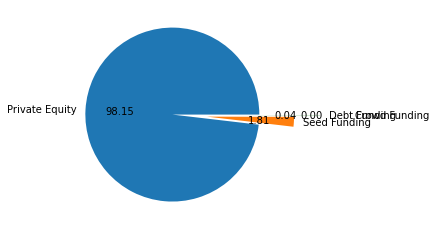

In [19]:
#file.InvestmentType.unique()
file.InvestmentType.replace('SeedFunding','Seed Funding',inplace = True)
file.InvestmentType.replace('Crowd funding','Crowd Funding',inplace = True)
file.InvestmentType.replace('PrivateEquity','Private Equity',inplace = True)
file.InvestmentType.fillna('Unknown',inplace = True)
#file.InvestmentType.unique()
np_type = np.array(file.InvestmentType,dtype = str)
file.AmountInUSD.fillna(0,inplace = True)
np_fund = np.array(file.AmountInUSD,dtype = str)
fund = []
for i in np_fund:
    j = i.replace(',','')
    fund.append(int(j))
d = {}
j = 0
for i in np_type:
    d[i] = d.get(i,0)+fund[j]
    j = j+1
del d['Unknown']
t =[]
f = list(d.values())
f.sort()
f.reverse()
for i in range(len(f)):
    for j in d:
        if f[i] == d[j]:
            t.append(j)
s = sum(f)
for i in range(len(t)):
    print(t[i],end = ' ')
    a = f[i]*100/s
    print('%.02f'%a)
plt.pie(f,labels = t,autopct = '%.02f',explode = [0.1,0.3,0.6,0.9])
#plt.axis('equal')
plt.show()

### Investment Field vs Funding amount

In [20]:
#file.IndustryVertical.unique()
#file.IndustryVertical.replace('eCommerce','Ecommerce',inplace = True)
#file.IndustryVertical.replace('ECommerce','Ecommerce',inplace = True)
file.IndustryVertical.fillna('Unknown',inplace = True)
for i in range(len(file.IndustryVertical)):
    if('ecommerce' in file.loc[i,'IndustryVertical']):
        file.loc[i,'IndustryVertical']=file.loc[i,'IndustryVertical'].replace('ecommerce','Ecommerce')
    elif('eCommerce' in file.loc[i,'IndustryVertical']):
         file.loc[i,'IndustryVertical']=file.loc[i,'IndustryVertical'].replace('eCommerce','Ecommerce')
    elif('ECommerce' in file.loc[i,'IndustryVertical']):
        file.loc[i,'IndustryVertical']= file.loc[i,'IndustryVertical'].replace('ECommerce','Ecommerce')
#print(file.IndustryVertical.unique())
file.AmountInUSD.fillna(0,inplace = True)
np_fund = np.array(file.AmountInUSD,dtype = str)
fund = []
for i in np_fund:
    j = i.replace(',','')
    fund.append(int(j))
d = {}
j = 0
for i in file.IndustryVertical:
    d[i] = d.get(i,0)+fund[j]
    j = j+1
del d['Unknown']
I = []
f =[]
funds =list(d.values())
funds.sort()
funds.reverse()
for i in range(5):
    for j in d:
        if d[j] == funds[i]:
            f.append(funds[i])
            I.append(j)
s = sum(f)
for i in range(5):
    print(I[i],end = ' ')
    a = f[i]*100/s
    print(round(a,2))
           

    



Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


### Startup Vs Funding Amount

In [21]:
for i in range(len(file.StartupName)):
    if 'Ola' in  file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Ola'
    elif 'Paytm' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Paytm'
    elif 'Oyo' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Oyo'
    elif 'OYO' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Oyo'
    elif 'Flipkart' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Flipkart'
file.AmountInUSD.fillna(0,inplace = True)
np_fund = np.array(file.AmountInUSD,dtype = str)
fund = []
for i in np_fund:
    j = i.replace(',','')
    fund.append(int(j))
d= {}
j = 0
for i in file.StartupName:
    d[i] = d.get(i,0)+fund[j]
    j = j+1
f= list(d.values())
a = []
f.sort()
f.reverse()
for i in range(0,5):
    for j in d:
        if f[i] == d[j]:
            print(j)


Paytm
Flipkart
Ola
Snapdeal
Oyo


### Startup vs Funding times

In [22]:
for i in range(len(file.StartupName)):
    if 'Ola' in  file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Ola'
    elif 'Paytm' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Paytm'
    elif 'Oyo' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Oyo'
    elif 'OYO' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Oyo'
    elif 'Flipkart' in file.loc[i,'StartupName']:
        file.loc[i,'StartupName'] = 'Flipkart'
a = file.StartupName.value_counts()
a

Ola                 9
Oyo                 7
Swiggy              7
Paytm               6
UrbanClap           6
                   ..
Runnr               1
LoanTap             1
CrownIt             1
MyDidi              1
couponmachine.in    1
Name: StartupName, Length: 1992, dtype: int64

In [23]:
d = {}
for i in file.StartupName:
    d[i] = d.get(i,0)+1
f = list(d.values())
f.sort()
f.reverse()
i = 0
while(i<5):
    for j in d:
        if d[j] == f[i]:
            print(j,f[i])
            i = i+1
l = sorted(d.values())
l.reverse()


Ola 9
Swiggy 7
Oyo 7
UrbanClap 6
Paytm 6
Medinfi 5
NoBroker 5
Jugnoo 5


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
start = pd.read_csv('startup.csv',encoding = 'utf-8')
df = start.copy()
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x:float(str(x).replace(",","")))
startupnames = df['StartupName'].value_counts()[0:5]
s = startupnames.index
n = startupnames.values
for i in range(len(s)):
    print(s[i],n[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


### No of Investments by each Investor

In [25]:
file.InvestorsName.fillna('Unknown',inplace = True)
d = {}
for i in file.InvestorsName:
    if len(i.split(','))>1:
        j = i.split(',')
        for k in j:
            d[k.strip()] = d.get(k.strip(),0)+1
    else:
        d[i] = d.get(i,0)+1
a = max(d.values())
for i in d:
    if d[i] == a:
        print(i,a)

Sequoia Capital 64
